In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from matplotlib import cm

In [12]:
#Load in the data
X = pd.read_csv("../Data/trainX.csv")
y = pd.read_csv("../Data/trainY.csv")

In [13]:
# create a 75/25 stratified split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.25)

In [14]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2249, 41) (2249, 1)
Test set: (750, 41) (750, 1)


In [15]:
# This is the started point you need and can input into models from here, 
# let me know if you have any questions or need any explanation/help!

## Random Forest

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [17]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred = rfr.predict(X_test)
y_pred[:20]

array([13.28342209, 14.13488982, 15.56377809, 15.9705218 , 14.91761887,
       17.12667093, 17.90250705, 17.97546521, 14.43590317, 14.10745519,
       15.43265564, 17.79316084, 16.65939195, 17.46460695, 17.30977117,
       14.95188097, 17.96453126, 13.57575592, 17.59730764, 18.11654158])

In [19]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

2.12772787321812

In [20]:
# Calculate the absolute errors
errors = abs(y_pred - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 73.14 %


In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.9min finished
/Users/coleleppert/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [23]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [24]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [26]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test.values)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test.values)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

/Users/coleleppert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model Performance
Average Error: 2.8720 degrees.
Accuracy = 73.01%.
Model Performance
Average Error: 2.8222 degrees.
Accuracy = 73.26%.
Improvement of 0.34%.


In [27]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [28]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.8min finished
/Users/coleleppert/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [29]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test.values)

base_accuracy = evaluate(base_model, X_test, y_test.values)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2.6501 degrees.
Accuracy = 74.30%.
Model Performance
Average Error: 2.8720 degrees.
Accuracy = 73.01%.
Improvement of 1.77%.


## Extra Trees

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

In [36]:
base_model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(base_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -1.481 (0.110)


In [37]:
base_model.fit(X_train, y_train.values.ravel());

In [38]:
# Use the forest's predict method on the test data
predictions = base_model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test.values)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.81


In [39]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.36 %.


In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
et = ExtraTreesRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = et, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [41]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.7min finished
/Users/coleleppert/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [42]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test.values)

base_accuracy = evaluate(base_model, X_test, y_test.values)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 2.5917 degrees.
Accuracy = 74.67%.
Model Performance
Average Error: 2.8084 degrees.
Accuracy = 73.36%.
Improvement of 1.79%.


In [56]:
best_grid.feature_importances_

array([0.03882884, 0.01544201, 0.00984284, 0.09324014, 0.03834492,
       0.01994115, 0.01229977, 0.06629293, 0.03629531, 0.00579083,
       0.00320508, 0.01212859, 0.02582855, 0.00894486, 0.01051798,
       0.07228622, 0.01230873, 0.02319554, 0.00905654, 0.02426601,
       0.04680688, 0.00813078, 0.01041198, 0.01190509, 0.0123259 ,
       0.01386706, 0.00856566, 0.01284982, 0.00864971, 0.00786778,
       0.02711091, 0.01901536, 0.03155111, 0.06077403, 0.02993293,
       0.01425289, 0.01261764, 0.01950504, 0.04387089, 0.03968649,
       0.0222452 ])

## XGBoost

In [79]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [80]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [81]:
mean_train = np.mean(y_train.values)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 2.15


In [90]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [91]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [92]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-mae:10.97150
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:7.78454
[2]	Test-mae:5.58354
[3]	Test-mae:4.09780
[4]	Test-mae:3.14054
[5]	Test-mae:2.51102
[6]	Test-mae:2.12623
[7]	Test-mae:1.88110
[8]	Test-mae:1.73144
[9]	Test-mae:1.64432
[10]	Test-mae:1.58502
[11]	Test-mae:1.56194
[12]	Test-mae:1.54481
[13]	Test-mae:1.52201
[14]	Test-mae:1.50803
[15]	Test-mae:1.51043
[16]	Test-mae:1.50799
[17]	Test-mae:1.50768
[18]	Test-mae:1.51549
[19]	Test-mae:1.50474
[20]	Test-mae:1.50749
[21]	Test-mae:1.51356
[22]	Test-mae:1.51787
[23]	Test-mae:1.51939
[24]	Test-mae:1.51585
[25]	Test-mae:1.51627
[26]	Test-mae:1.52378
[27]	Test-mae:1.52856
[28]	Test-mae:1.53094
[29]	Test-mae:1.53420
Stopping. Best iteration:
[19]	Test-mae:1.50474

Best MAE: 1.50 with 20 rounds


In [117]:
y_pred = model.predict(y.test.values)
# Calculate the absolute errors
errors = abs(y_pred - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

AttributeError: 'DataFrame' object has no attribute 'test'

In [93]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,10.855168,0.016313,10.872191,0.075356
1,7.679426,0.007956,7.726332,0.046705
2,5.472363,0.009039,5.550942,0.039340
3,3.967040,0.010882,4.085638,0.051375
4,2.957236,0.018962,3.119698,0.053207
5,2.281261,0.021919,2.482980,0.059800
6,1.844381,0.023692,2.079853,0.062789
7,1.552106,0.023698,1.827821,0.069972
8,1.356369,0.025264,1.675421,0.075077
9,1.232082,0.030179,1.582012,0.076451


In [94]:
cv_results['test-mae-mean'].min()

1.4656474

In [95]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [96]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
	MAE 1.4978784 for 14 rounds
CV with max_depth=9, min_child_weight=6
	MAE 1.4964296000000001 for 15 rounds
CV with max_depth=9, min_child_weight=7
	MAE 1.4943318 for 17 rounds
CV with max_depth=10, min_child_weight=5
	MAE 1.5099453999999999 for 18 rounds
CV with max_depth=10, min_child_weight=6
	MAE 1.5076578 for 15 rounds
CV with max_depth=10, min_child_weight=7
	MAE 1.5175888 for 14 rounds
CV with max_depth=11, min_child_weight=5
	MAE 1.520325 for 16 rounds
CV with max_depth=11, min_child_weight=6
	MAE 1.507841 for 18 rounds
CV with max_depth=11, min_child_weight=7
	MAE 1.5069599999999999 for 17 rounds
Best params: 9, 7, MAE: 1.4943318


In [97]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [98]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [99]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 1.4943316000000002 for 17 rounds
CV with subsample=1.0, colsample=0.9
	MAE 1.4893334 for 17 rounds
CV with subsample=1.0, colsample=0.8
	MAE 1.5124662 for 18 rounds
CV with subsample=1.0, colsample=0.7
	MAE 1.4980644 for 19 rounds
CV with subsample=0.9, colsample=1.0
	MAE 1.506078 for 17 rounds
CV with subsample=0.9, colsample=0.9
	MAE 1.487766 for 16 rounds
CV with subsample=0.9, colsample=0.8
	MAE 1.4931712000000001 for 16 rounds
CV with subsample=0.9, colsample=0.7
	MAE 1.4836820000000002 for 17 rounds
CV with subsample=0.8, colsample=1.0
	MAE 1.5036366 for 19 rounds
CV with subsample=0.8, colsample=0.9
	MAE 1.488167 for 17 rounds
CV with subsample=0.8, colsample=0.8
	MAE 1.484364 for 20 rounds
CV with subsample=0.8, colsample=0.7
	MAE 1.4963878 for 16 rounds
CV with subsample=0.7, colsample=1.0
	MAE 1.5350004 for 15 rounds
CV with subsample=0.7, colsample=0.9
	MAE 1.5179491999999999 for 13 rounds
CV with subsample=0.7, colsample=0.8
	MAE 1.

In [103]:
params['subsample'] = .9
params['colsample_bytree'] = 0.7

In [111]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv( params,dtrain, num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 31 µs
CV with eta=0.3
CPU times: user 1.81 s, sys: 75.8 ms, total: 1.89 s
Wall time: 678 ms
	MAE 1.4836818 for 17 rounds

CV with eta=0.2
CPU times: user 2.28 s, sys: 55.4 ms, total: 2.33 s
Wall time: 699 ms
	MAE 1.4491454000000001 for 25 rounds

CV with eta=0.1
CPU times: user 4.81 s, sys: 321 ms, total: 5.13 s
Wall time: 2.7 s
	MAE 1.3974834 for 61 rounds

CV with eta=0.05
CPU times: user 8.46 s, sys: 254 ms, total: 8.71 s
Wall time: 2.89 s
	MAE 1.3965428 for 125 rounds

CV with eta=0.01
CPU times: user 43.5 s, sys: 1.26 s, total: 44.8 s
Wall time: 15.1 s
	MAE 1.3815268 for 695 rounds

CV with eta=0.005
CPU times: user 58.5 s, sys: 692 ms, total: 59.2 s
Wall time: 16.2 s
	MAE 1.399572 for 998 rounds

Best params: 0.01, MAE: 1.3815268


In [112]:
params['eta'] = .01

In [113]:
params

{'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.01,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [114]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:15.41131
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:15.25896
[2]	Test-mae:15.10853
[3]	Test-mae:14.95882
[4]	Test-mae:14.81070
[5]	Test-mae:14.66454
[6]	Test-mae:14.51931
[7]	Test-mae:14.37653
[8]	Test-mae:14.23432
[9]	Test-mae:14.09348
[10]	Test-mae:13.95543
[11]	Test-mae:13.81875
[12]	Test-mae:13.68242
[13]	Test-mae:13.54795
[14]	Test-mae:13.41468
[15]	Test-mae:13.28241
[16]	Test-mae:13.15149
[17]	Test-mae:13.02249
[18]	Test-mae:12.89424
[19]	Test-mae:12.76754
[20]	Test-mae:12.64225
[21]	Test-mae:12.51807
[22]	Test-mae:12.39595
[23]	Test-mae:12.27538
[24]	Test-mae:12.15558
[25]	Test-mae:12.03698
[26]	Test-mae:11.91891
[27]	Test-mae:11.80302
[28]	Test-mae:11.68768
[29]	Test-mae:11.57293
[30]	Test-mae:11.46023
[31]	Test-mae:11.34811
[32]	Test-mae:11.23733
[33]	Test-mae:11.12686
[34]	Test-mae:11.01749
[35]	Test-mae:10.91047
[36]	Test-mae:10.80476
[37]	Test-mae:10.70006
[38]	Test-mae:10.59614
[39]	Test-mae:10.49404
[40]	Test-mae:10.39275
[41]	Test-m

[357]	Test-mae:1.57000
[358]	Test-mae:1.56793
[359]	Test-mae:1.56556
[360]	Test-mae:1.56376
[361]	Test-mae:1.56202
[362]	Test-mae:1.56013
[363]	Test-mae:1.55820
[364]	Test-mae:1.55580
[365]	Test-mae:1.55362
[366]	Test-mae:1.55203
[367]	Test-mae:1.55052
[368]	Test-mae:1.54893
[369]	Test-mae:1.54739
[370]	Test-mae:1.54539
[371]	Test-mae:1.54369
[372]	Test-mae:1.54235
[373]	Test-mae:1.54114
[374]	Test-mae:1.53965
[375]	Test-mae:1.53816
[376]	Test-mae:1.53685
[377]	Test-mae:1.53561
[378]	Test-mae:1.53385
[379]	Test-mae:1.53209
[380]	Test-mae:1.53033
[381]	Test-mae:1.52880
[382]	Test-mae:1.52711
[383]	Test-mae:1.52583
[384]	Test-mae:1.52425
[385]	Test-mae:1.52302
[386]	Test-mae:1.52166
[387]	Test-mae:1.52026
[388]	Test-mae:1.51883
[389]	Test-mae:1.51757
[390]	Test-mae:1.51590
[391]	Test-mae:1.51477
[392]	Test-mae:1.51378
[393]	Test-mae:1.51256
[394]	Test-mae:1.51109
[395]	Test-mae:1.50982
[396]	Test-mae:1.50848
[397]	Test-mae:1.50731
[398]	Test-mae:1.50627
[399]	Test-mae:1.50534
[400]	Test-

In [115]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:15.41131
[1]	Test-mae:15.25896
[2]	Test-mae:15.10853
[3]	Test-mae:14.95882
[4]	Test-mae:14.81070
[5]	Test-mae:14.66454
[6]	Test-mae:14.51931
[7]	Test-mae:14.37653
[8]	Test-mae:14.23432
[9]	Test-mae:14.09348
[10]	Test-mae:13.95543
[11]	Test-mae:13.81875
[12]	Test-mae:13.68242
[13]	Test-mae:13.54795
[14]	Test-mae:13.41468
[15]	Test-mae:13.28241
[16]	Test-mae:13.15149
[17]	Test-mae:13.02249
[18]	Test-mae:12.89424
[19]	Test-mae:12.76754
[20]	Test-mae:12.64225
[21]	Test-mae:12.51807
[22]	Test-mae:12.39596
[23]	Test-mae:12.27538
[24]	Test-mae:12.15558
[25]	Test-mae:12.03698
[26]	Test-mae:11.91890
[27]	Test-mae:11.80302
[28]	Test-mae:11.68768
[29]	Test-mae:11.57293
[30]	Test-mae:11.46023
[31]	Test-mae:11.34811
[32]	Test-mae:11.23733
[33]	Test-mae:11.12686
[34]	Test-mae:11.01749
[35]	Test-mae:10.91047
[36]	Test-mae:10.80476
[37]	Test-mae:10.70006
[38]	Test-mae:10.59614
[39]	Test-mae:10.49404
[40]	Test-mae:10.39275
[41]	Test-mae:10.29293
[42]	Test-mae:10.19321
[43]	Test-mae:10.0949

[360]	Test-mae:1.56376
[361]	Test-mae:1.56202
[362]	Test-mae:1.56013
[363]	Test-mae:1.55820
[364]	Test-mae:1.55580
[365]	Test-mae:1.55362
[366]	Test-mae:1.55203
[367]	Test-mae:1.55052
[368]	Test-mae:1.54893
[369]	Test-mae:1.54739
[370]	Test-mae:1.54539
[371]	Test-mae:1.54369
[372]	Test-mae:1.54235
[373]	Test-mae:1.54114
[374]	Test-mae:1.53965
[375]	Test-mae:1.53816
[376]	Test-mae:1.53685
[377]	Test-mae:1.53561
[378]	Test-mae:1.53385
[379]	Test-mae:1.53209
[380]	Test-mae:1.53033
[381]	Test-mae:1.52880
[382]	Test-mae:1.52711
[383]	Test-mae:1.52583
[384]	Test-mae:1.52425
[385]	Test-mae:1.52302
[386]	Test-mae:1.52166
[387]	Test-mae:1.52026
[388]	Test-mae:1.51883
[389]	Test-mae:1.51757
[390]	Test-mae:1.51590
[391]	Test-mae:1.51477
[392]	Test-mae:1.51378
[393]	Test-mae:1.51256
[394]	Test-mae:1.51109
[395]	Test-mae:1.50982
[396]	Test-mae:1.50848
[397]	Test-mae:1.50731
[398]	Test-mae:1.50627
[399]	Test-mae:1.50534
[400]	Test-mae:1.50403
[401]	Test-mae:1.50271
[402]	Test-mae:1.50187
[403]	Test-

In [116]:
mean_absolute_error(best_model.predict(dtest), y_test)

1.4212064491548566

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [46]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [47]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.011866


In [49]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [50]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.237889,0.038978,14.241103,0.088346
1,12.865715,0.038529,12.874161,0.083060
2,11.635075,0.031721,11.647974,0.084480
3,10.530241,0.032822,10.550282,0.075975
4,9.536764,0.022526,9.559766,0.080281


In [51]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.152383
Name: test-rmse-mean, dtype: float64


In [52]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

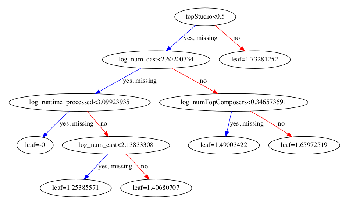

In [53]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

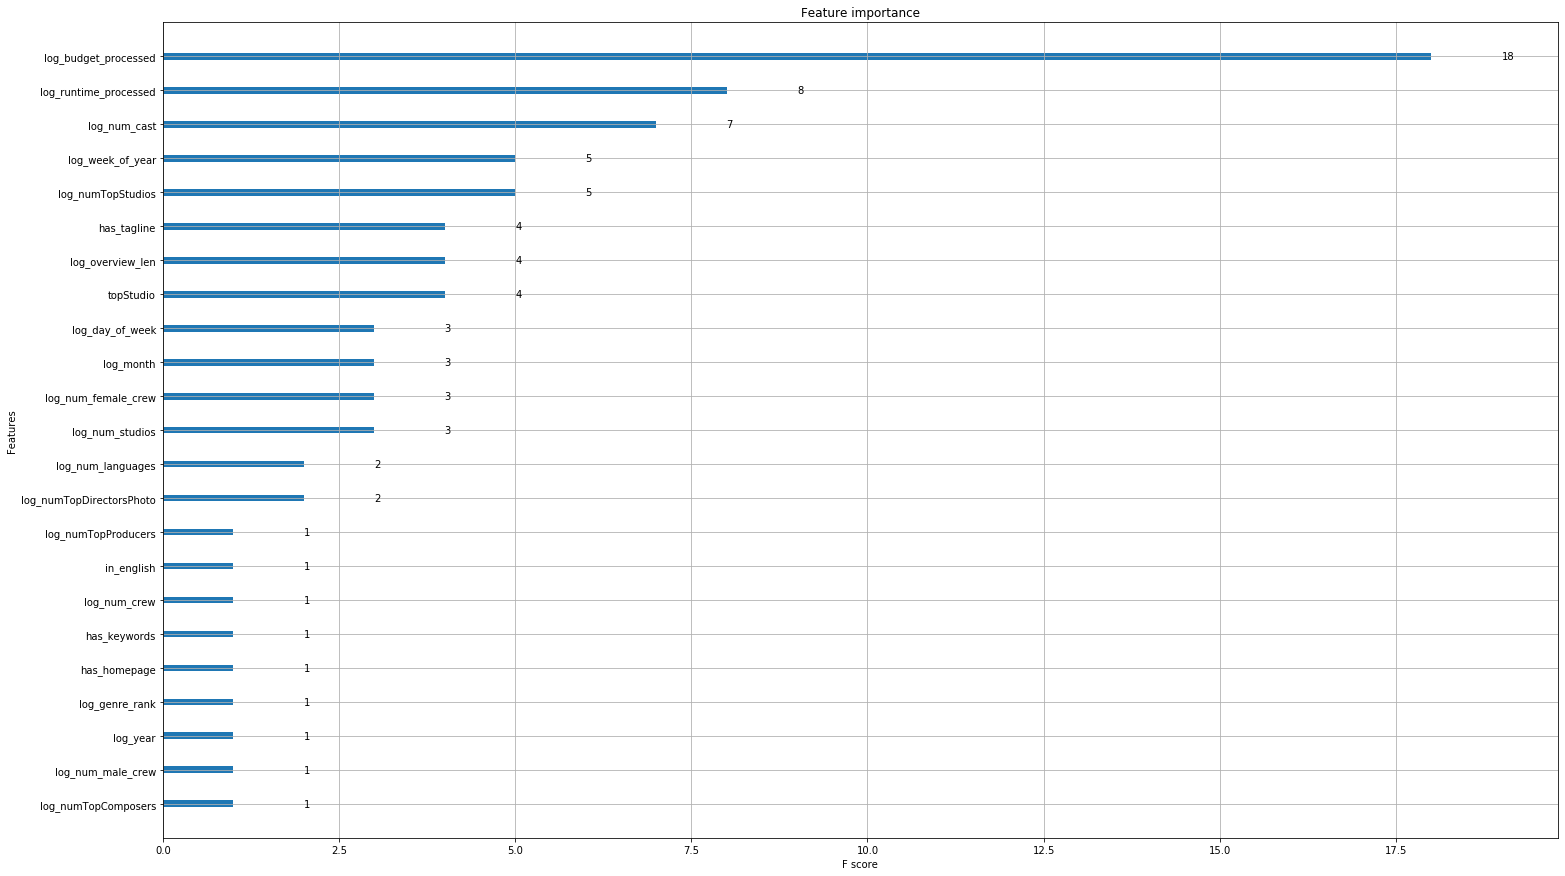

In [55]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## Gradient Boosting

In [69]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

MAE: -1.406 (0.110)


/Users/coleleppert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction: 15.188


In [70]:
# Calculate the absolute errors
errors = abs(yhat - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.33 %.


In [58]:
from sklearn.experimental import enable_hist_gradient_boosting

In [71]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# evaluate the model
model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

MAE: -1.433 (0.102)


/Users/coleleppert/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction: 15.146


In [72]:
# Calculate the absolute errors
errors = abs(yhat - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 72.97 %.


## LightGBM

In [65]:
# lightgbm for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(X_train, y_train)
# make a single prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

MAE: -1.425 (0.112)
Prediction: 15.776


In [66]:
mse = mean_squared_error(y_test,yhat)
rmse = np.sqrt(mse)
rmse

2.1557221299327094

In [67]:
# Calculate the absolute errors
errors = abs(yhat - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 72.87 %


## CatBoost

In [73]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# evaluate the model
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(X_train, y_train)


yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

MAE: -1.401 (0.100)
Prediction: 14.877


In [74]:
mse = mean_squared_error(y_test,yhat)
rmse = np.sqrt(mse)
rmse

2.105371926579817

In [75]:
# Calculate the absolute errors
errors = abs(yhat - y_test.values)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.values)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 73.09 %
